# Dados e Visualizações

Curso de Análise de dados para saúde e medicina da Alura.
Neste curso serão analisados os dados de COVID-19 distribuídos por várias fontes.

Fonte dos dados de casos confirmados: CSSEGISandData/COVID-19
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

### Importando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [3]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44228,44443,44503,44706,44988,45280,45490,45716,45839,45966
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087


In [4]:
confirmados.shape

(271, 316)

In [5]:
# Casos confirmados por país
confirmados_por_pais = confirmados.groupby("Country/Region").sum()
confirmados_por_pais

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,44228,44443,44503,44706,44988,45280,45490,45716,45839,45966
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,67296,68768,70254,71644,73196,75007,76727,78493,80429,81890
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,2086,2090,2093,2099,2107,2114,2124,2137,2148,2160


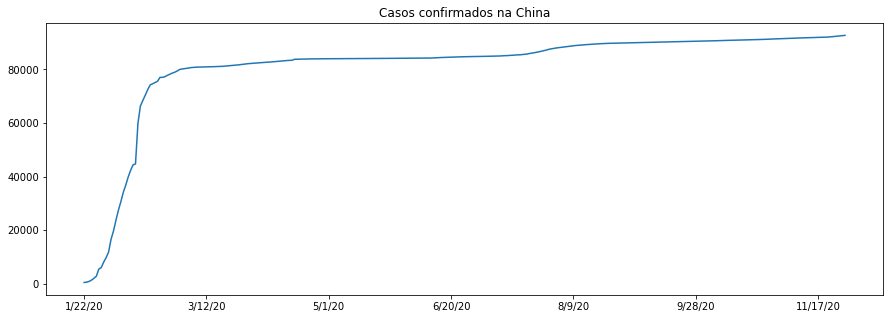

In [6]:
# Casos confirmados na China
plt.figure(figsize = (15, 5))
confirmados_por_pais.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

In [7]:
# Plotando novos casos
novos_casos_china = confirmados_por_pais.loc["China"][2:].diff().dropna()

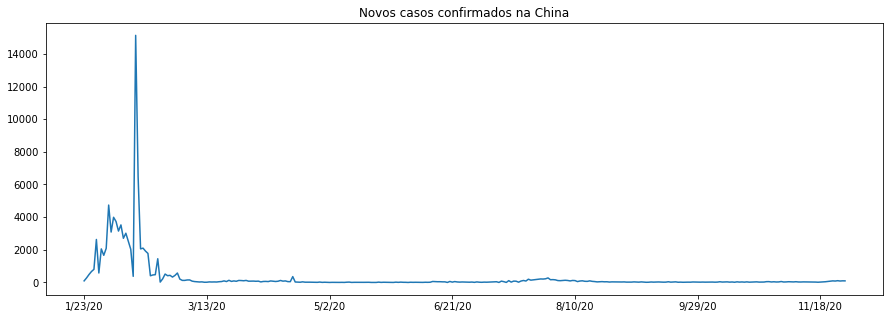

In [8]:
plt.figure(figsize=(15, 5))
novos_casos_china.plot()
plt.title("Novos casos confirmados na China")
plt.show()

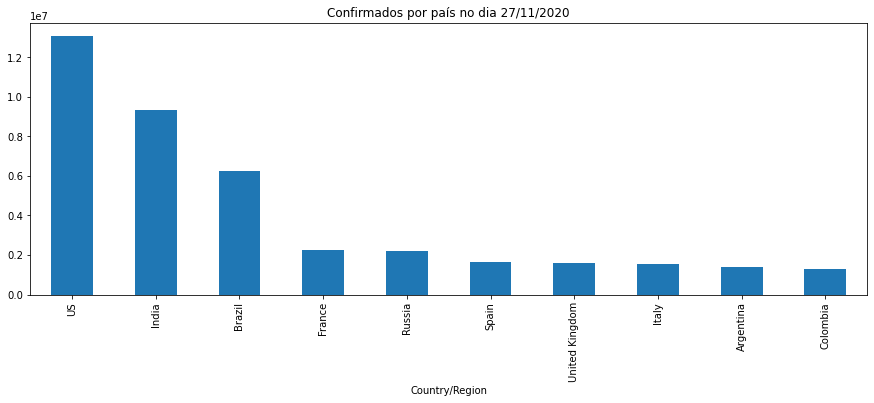

In [9]:
# Casos confirmados por país na última data.
plt.figure(figsize=(15,5))
confirmados_por_pais["11/27/20"].sort_values(ascending = False)[:10].plot(kind="bar")
plt.title("Confirmados por país no dia 27/11/2020")
plt.show()

## Inserindo novos datasets

In [10]:
# Adicionando novos datasets
mortes = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [11]:
mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1650,1661,1675,1687,1695,1712,1725,1737,1740,1752
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,657,672,685,699,716,735,743,753,771,787
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2224,2236,2255,2272,2294,2309,2329,2352,2372,2393
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,333,334,336,337,337,338,340,341,342,345


In [12]:
recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35350,35370,35422,35934,35976,36122,36145,36232,36295,36709
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14565,15055,15469,15842,16230,16666,17031,17352,17755,18152
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46962,47581,48183,48794,49421,50070,50712,51334,51946,52568
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5127,5239,5290,5358,5405,5503,5542,5649,5710,5710
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7062,7117,7273,7346,7351,7444,7517,7617,7697,7763


In [13]:
# Agrupando por paises
recuperados.groupby("Country/Region").sum()["11/27/20"].head()

Country/Region
Afghanistan    36295
Albania        17755
Algeria        51946
Andorra         5710
Angola          7697
Name: 11/27/20, dtype: int64

In [14]:
# Criando uma função para retornar os agrupamentos.
def ultimos_por_pais(data):
    return data.groupby("Country/Region").sum().iloc[:, -1]

In [15]:
ultimos_por_pais(confirmados).head()

Country/Region
Afghanistan    45966
Albania        36790
Algeria        81212
Andorra         6610
Angola         15087
Name: 11/28/20, dtype: int64

In [16]:
# Criando um array com confirmados, mortes e recuperados.
informacoes = [ultimos_por_pais(confirmados), ultimos_por_pais(mortes), ultimos_por_pais(recuperados)]

In [17]:
# Concatenando os valores
combinados = pd.concat(informacoes, axis = 1)
combinados.columns = ["confirmados", "mortes", "recuperados"]

In [18]:
# Exibindo dados
combinados.head()

,confirmados,mortes,recuperados
Country/Region,,,
Afghanistan,45966,1752,36709
Albania,36790,787,18152
Algeria,81212,2393,52568
Andorra,6610,76,5710
Angola,15087,345,7763


In [19]:
# Taxa de letalidade expressa em %
combinados.sum()
resumo = combinados.sum()
taxa_letalidade_1 = resumo["mortes"]/resumo["confirmados"]
print(taxa_letalidade_1 * 100)

2.3334068770219663


### Letalidade por país

In [20]:
taxa_letalidade_1 = combinados["mortes"] / resumo["confirmados"] * 100
taxa_letalidade_2 = combinados["mortes"] / (combinados["recuperados"] + combinados["mortes"]) * 100
combinados["taxa_letalidade_1"] = taxa_letalidade_1
combinados["taxa_letalidade_2"] = taxa_letalidade_2
combinados.head()

,confirmados,mortes,recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Afghanistan,45966,1752,36709,0.002815,4.555264
Albania,36790,787,18152,0.001264,4.155446
Algeria,81212,2393,52568,0.003845,4.353996
Andorra,6610,76,5710,0.000122,1.313515
Angola,15087,345,7763,0.000554,4.255057


In [21]:
combinados.sort_values("taxa_letalidade_1", ascending=False).head(10)

,confirmados,mortes,recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
US,13244417,266047,5023063,0.427425,5.030090
Brazil,6290272,172561,5581436,0.277232,2.998976
India,9392919,136696,8802267,0.219612,1.529215
Mexico,1101403,105459,803581,0.169428,11.601140
United Kingdom,1609141,58127,3500,0.093385,94.320671
Italy,1564532,54363,720861,0.087338,7.012554
France,2260789,52212,166715,0.083883,23.849046
Iran,935799,47486,648831,0.076290,6.819595
Spain,1628208,44668,150376,0.071763,22.901499


### Plotando gráficos

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='confirmados', ylabel='taxa_letalidade_1'>

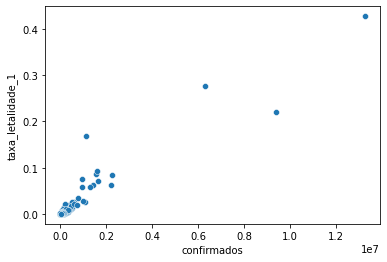

In [23]:
sns.scatterplot(data = combinados, x = "confirmados", y = "taxa_letalidade_1")

<AxesSubplot:xlabel='confirmados', ylabel='taxa_letalidade_2'>

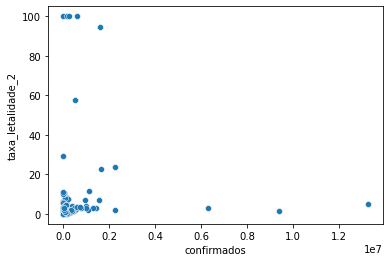

In [24]:
sns.scatterplot(data = combinados, x = "confirmados", y = "taxa_letalidade_2")

C:\Users\gladston\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxa_letalidade_1'>

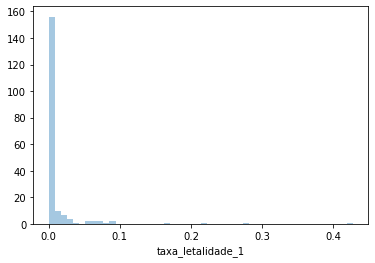

In [25]:
# Taxa de letalidade por país.
sns.distplot(combinados["taxa_letalidade_1"], kde=False)

<AxesSubplot:xlabel='recuperados'>

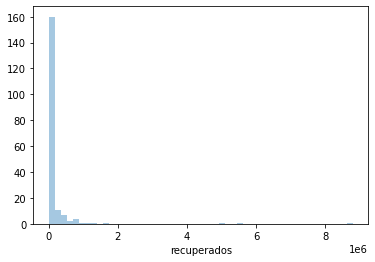

In [26]:
# Taxa de recuperados por país.
sns.distplot(combinados["recuperados"], kde=False)